# Twitter US Airline Sentiment

# 1. <a name = "link1"></a>Problem Statement

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

In this notebook, I am using text pre-processing, vectorization and sentiment analysis using both supervised and unsupervised (VADER, TextBlob)learning methods

## Data Description

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## Dataset

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone


## Index


- <a href = #link1># Problem Statement </a>

- <a href = #link2># Loading libraries </a>


- <a href = #link3># Loading and exploring the data </a> 


- <a href = #link4># Data Exploratory Analysis </a>


- <a href = #link5># Text Pre-processing </a> 


- <a href = #link6># Vectorization </a>


- <a href = #link7># Comparison of Supervised Models </a>


- <a href = #link8># Unsupervised Learning </a>


- <a href = #link9># Comparison of Unsupervised Models </a>

- <a href = #link10># Summary </a>


# 2. <a name = "link2"></a>Loading libraries

In [1]:
!pip install contractions
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# NLP libraries

from nltk.tokenize.toktok import ToktokTokenizer
import spacy

# Import necessary libraries.
import re, string, unicodedata
import nltk                                   # Natural language processing tool-kit
import contractions
# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score      

     |████████████████████████████████| 321 kB 5.0 MB/s 
     |████████████████████████████████| 284 kB 42.7 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85449 sha256=146b50459c66f5b56a12b33b71dca072f5b73eee7bec19b44e129d502060005e
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 125 kB 5.1 MB/s 


# 3. <a name = "link3"></a>Loading and exploring the data
In this section the goal is to load the data into dataframe and check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [2]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/'
dataset_file = project_path + 'Tweets.csv'

In [3]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#reading dataset
tweet = pd.read_csv(dataset_file)
df = tweet.copy()

In [5]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


The column `airline_sentiment` is the target variable for prediction and rest of the columns are independent variables. The data include user, date created, location of the tweets and confidence of the sentiment.From the random 5 head and tail rows, I do see missing values for some of the variables but needs futher investigation to check the usability

In [7]:
df.shape
print("Dataset contains", df.shape[0], "sample points and", df.shape[1], "distinct features of customer information")

Dataset contains 14640 sample points and 15 distinct features of customer information


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Dataset contains Int, float and object types. We will look at the data type conversion if needed at later stage.

In [9]:
pd.DataFrame(
    data={
        "% of Missing Values": round(df.isna().sum() / df.isna().count() * 100, 2)
    }
)

,% of Missing Values
tweet_id,0.00
airline_sentiment,0.00
airline_sentiment_confidence,0.00
negativereason,37.31
negativereason_confidence,28.13
airline,0.00
airline_sentiment_gold,99.73
name,0.00
negativereason_gold,99.78
retweet_count,0.00


It appears that there are |missing values in the dataset. However need to investigate further to the column unique values to see if imputation is necessary.

In [10]:
#checking the percentage of each class in the dataset
(df.airline_sentiment.value_counts())/(df.airline_sentiment.count())

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

62% users have negative sentiment
21% users have neural sentiment
16% users have positive sentiment


This shows an imbalance of classes.However, the dataset does not imply complete imbalance of majority or minority class as we do have sufficent samples of all the classes.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [12]:
df.describe(include=['object']).T

,count,unique,top,freq
airline_sentiment,14640,3,negative,9178
negativereason,9178,10,Customer Service Issue,2910
airline,14640,6,United,3822
airline_sentiment_gold,40,3,negative,32
name,14640,7701,JetBlueNews,63
negativereason_gold,32,13,Customer Service Issue,12
text,14640,14427,@united thanks,6
tweet_coord,1019,832,"[0.0, 0.0]",164
tweet_created,14640,14247,2015-02-24 09:54:34 -0800,5
tweet_location,9907,3081,"Boston, MA",157


- Jetbluenews has the most number of tweets
- Majority of the sentiments in the dataset are negative
- Main negative reason is related to customer service issue
- Majority of the twees originated from Boston, MA
- Timezone of most of the user tweets belongs to Eastern time

# 4. <a name = "link4"></a>Data Exploratory Analysis

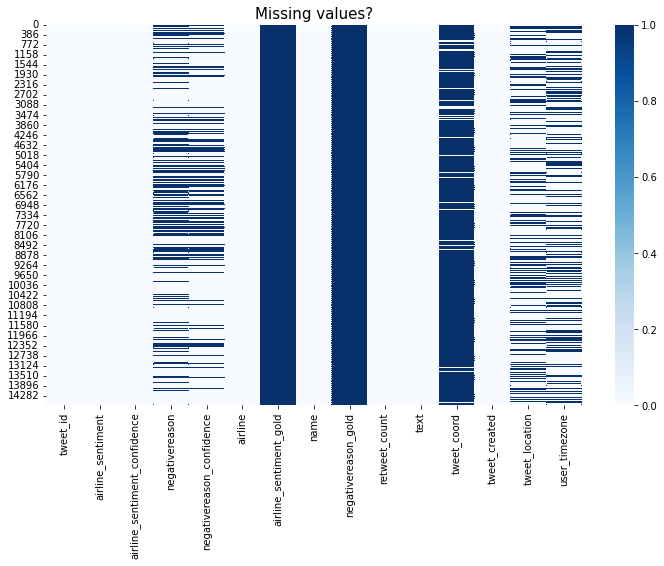

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

- There are no missing values in `text` which is our main feature for the sentiment analysis. I don't see a pattern of missing value occurence happening together

In [14]:
# check the missing values for all the columns
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column 
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

In [15]:
# get the count of missing values in every column of the dataframe
return_missing_values(df)

negativereason_confidence     4118
tweet_location                4733
user_timezone                 4820
negativereason                5462
tweet_coord                  13621
airline_sentiment_gold       14600
negativereason_gold          14608
dtype: int64

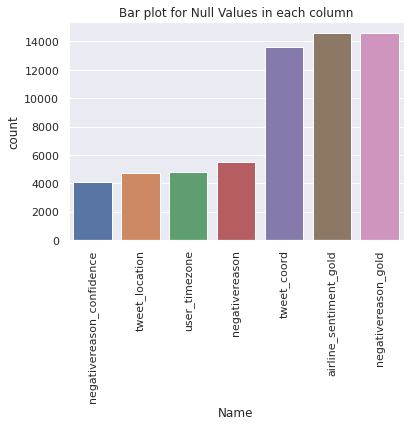

In [16]:
#plotting the count of missing values 
plot_missing_values(df)

In [17]:
#get the unique values of every column
def return_unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe

In [18]:
unidf = return_unique_values(df)
print(unidf)

                        Features  Uniques
0                       tweet_id    14485
1              airline_sentiment        3
2   airline_sentiment_confidence     1023
3                 negativereason       10
4      negativereason_confidence     1410
5                        airline        6
6         airline_sentiment_gold        3
7                           name     7701
8            negativereason_gold       13
9                  retweet_count       18
10                          text    14427
11                   tweet_coord      832
12                 tweet_created    14247
13                tweet_location     3081
14                 user_timezone       85


The dataset contains tweets of 6 airlines and negative reason falls under 10 categories

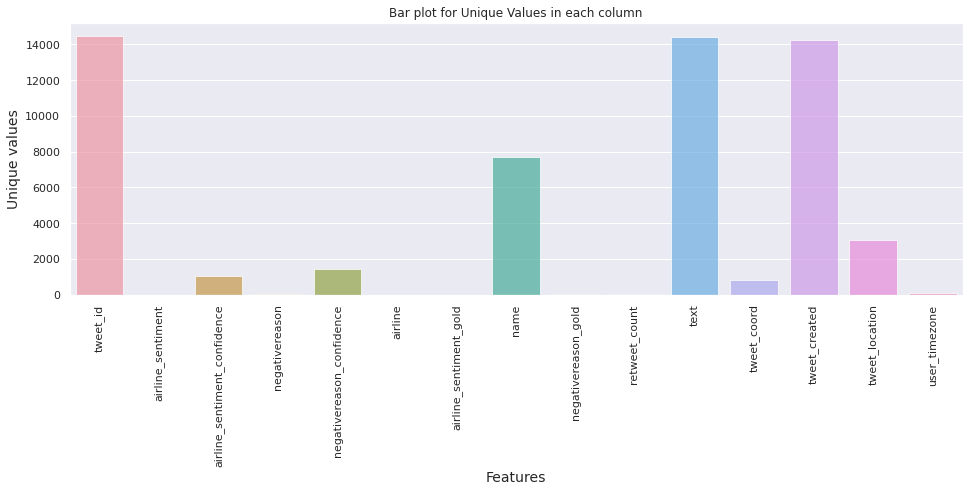

In [19]:
# plot the count of unique values in every column
f, ax = plt.subplots(1,1, figsize=(16,5))
sns.barplot(x=unidf['Features'], y=unidf['Uniques'], alpha=0.7)
plt.title('Bar plot for Unique Values in each column')
plt.ylabel('Unique values', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.xticks(rotation=90)
plt.show()

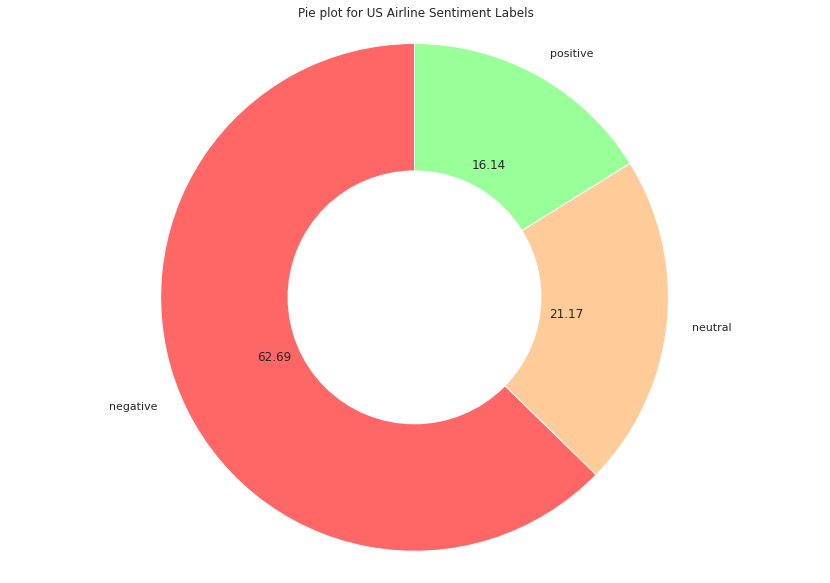

In [20]:
#plot for Twitter US Airline Sentiment Labels
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(df['airline_sentiment'].value_counts(), labels=df['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for US Airline Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

About 62% reported sentiments were negative, which indicates a wide displeasure of the airline service among users, followed by 21.17% neutral and 16.14% positive tweets.

In [21]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

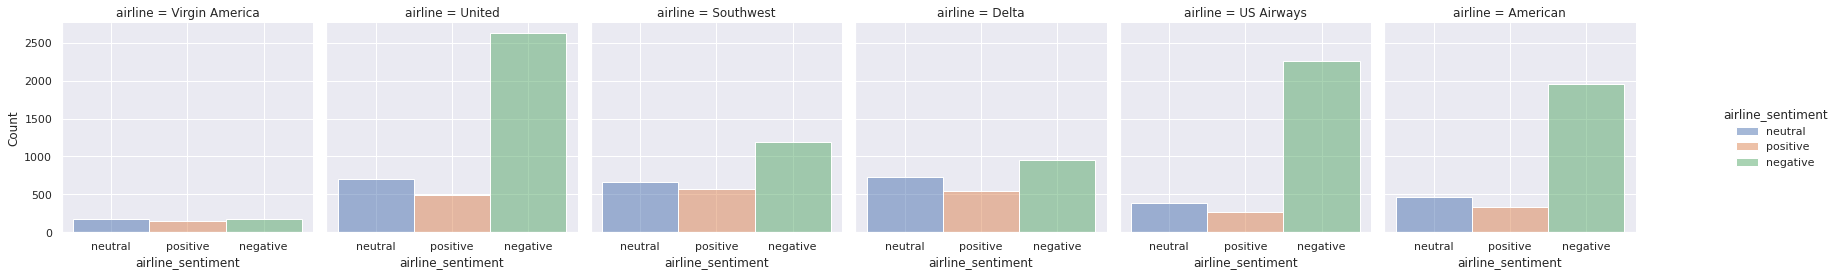

In [22]:
sns.displot(
    df, x="airline_sentiment",  col="airline",
    binwidth=4, height=4, facet_kws=dict(margin_titles=True), hue='airline_sentiment')

Among all the airlines, United seem to have the major negative reviews, followed by US Airways and American. Virgin America and Delta have even distribution of sentiments among the users.

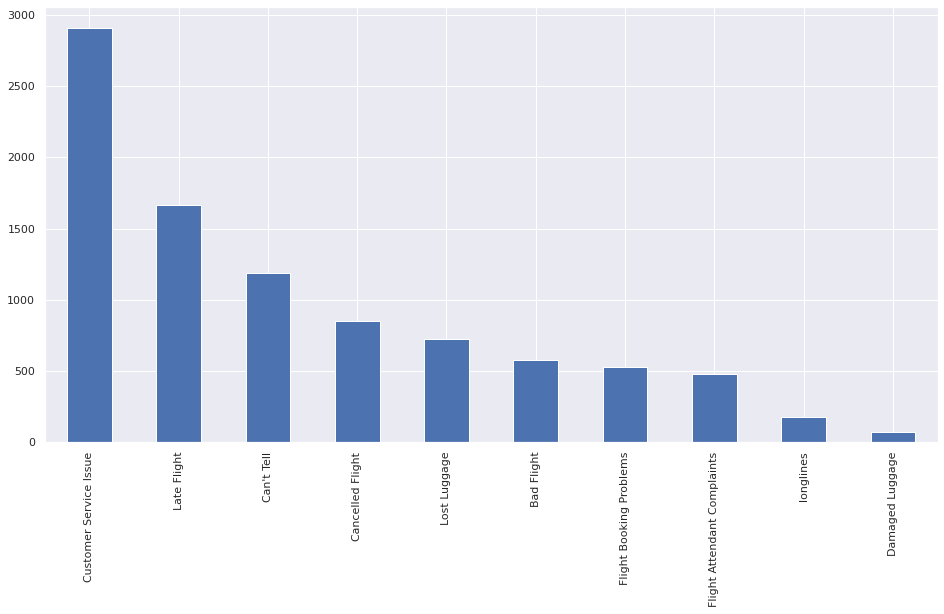

In [23]:
f, ax = plt.subplots(1,1, figsize=(16,8))
df['negativereason'].value_counts().plot(kind="bar")
plt.show()

Customer service seems to be the main reason for the negative sentiment overall. Followed by late flight. Damaged luggage seems to be the least of the reasons for the negavie sentiment 

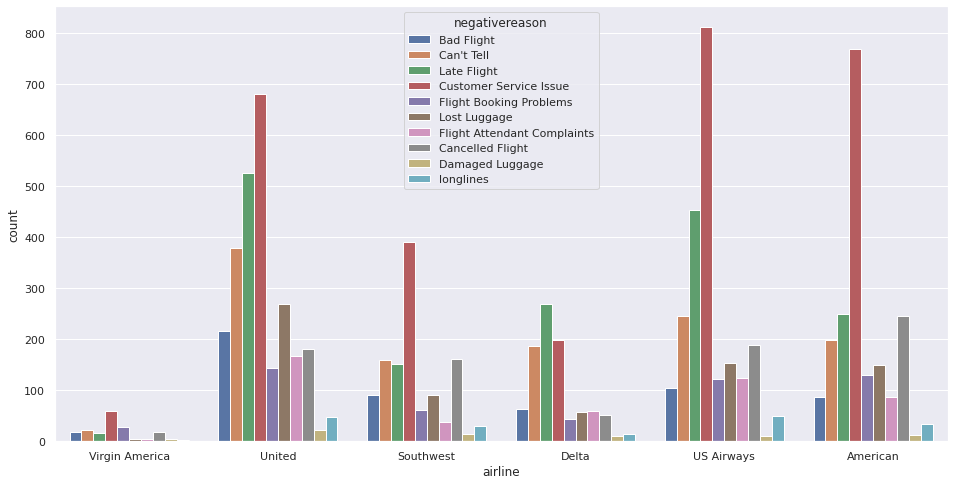

In [24]:
f, ax = plt.subplots(1,1, figsize=(16,8))
ax = sns.countplot(x="airline", hue="negativereason", data=df)
plt.show()

Customer service seems to be the major concern for the users across airlines, except for Delta where "late flight" is the major concern. 

In [25]:
df.groupby(['negativereason','airline']).size().sort_values(ascending=False) 

negativereason               airline       
Customer Service Issue       US Airways        811
                             American          768
                             United            681
Late Flight                  United            525
                             US Airways        453
Customer Service Issue       Southwest         391
Can't Tell                   United            379
Lost Luggage                 United            269
Late Flight                  Delta             269
                             American          249
Can't Tell                   US Airways        246
Cancelled Flight             American          246
Bad Flight                   United            216
Customer Service Issue       Delta             199
Can't Tell                   American          198
Cancelled Flight             US Airways        189
Can't Tell                   Delta             186
Cancelled Flight             United            181
Flight Attendant Complaints  United   

It looks like the majority of issues are related to 'customer service' and 'late flight' across airlines

In [26]:
# function to create labeled barplots
def labeled_barplot(data, feature,  title, pallet,perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(16, 4))
    else:
        plt.figure(figsize=(16, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data[feature],
        palette=pallet,
        order=data[feature].value_counts().index[:20],
    )
    ax.set_title('Frequency of {} tweeting about US Airline Sentiment'.format(title))

    for p in ax.patches:
        if perc == True:
            label = "{:1.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### **Top 20 users by number of tweets**

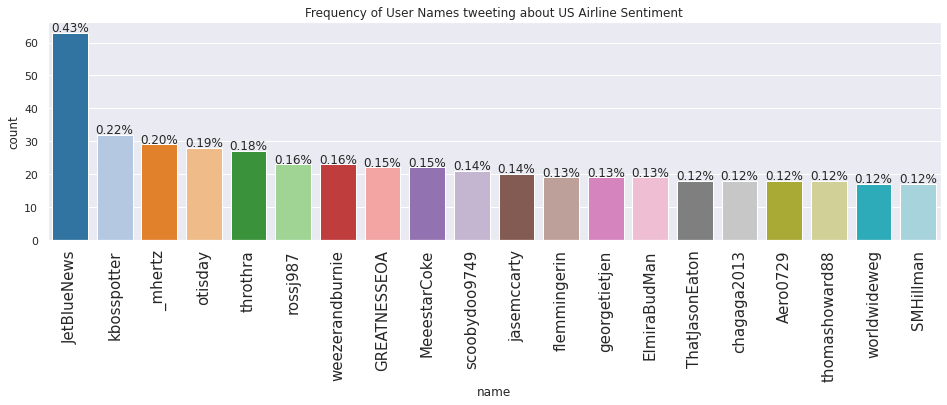

In [27]:
#Visualize the top 20 users by number of tweets
labeled_barplot(df, 'name', 'User Names','tab20')

* Jetbluenews is the user who created the highest number of tweets in this dataset, followed by kbosspotter and mhertz

### **Top 20 user locations based on the number of tweets**

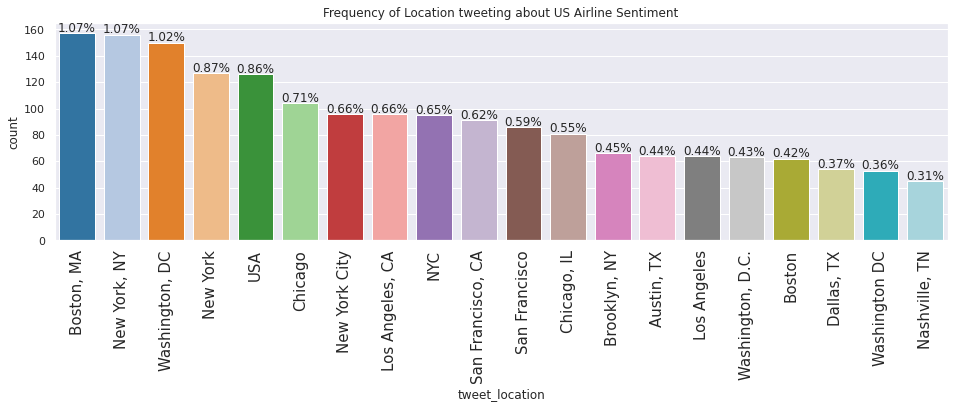

In [28]:
#Visualize the top 20 sources by number of tweets
labeled_barplot(df, 'tweet_location','Location', 'tab20')

* As we can see in the above all the locations were not in the format of city,country.
* We take top 50 user locations with more number of tweets try to make the format into city,country.

In [29]:
# take the top 500 user locations based on no of tweets
dt = df['tweet_location'].value_counts().reset_index()  # get the counts of tweets which contains a fixed no of hashtags
dt.columns = ['tweet_location', 'count']
dt = dt.sort_values(['count'],ascending=False)[:50] #top 50 places
dt.head()

,tweet_location,count
0,"Boston, MA",157
1,"New York, NY",156
2,"Washington, DC",150
3,New York,127
4,USA,126


In [30]:
#try to make the format into city,country for the top 50 places with more number of tweets
city = []
state = []
country = []
for i in dt['tweet_location']:
  loc = i.split(',')
  if len(loc)>1:   #if it has more than one token
    city.append(loc[0])
    state.append(loc[1])
  else:
    city.append('other') #if number of tokens is 1 then we keep it as other
    state.append('other')
dt['city'] = city
dt['state'] = state
dictionary = dict(zip(dt['city'],dt['state']))  #create a dictionary with key as city and value maps to its country
dt.head()

,tweet_location,count,city,state
0,"Boston, MA",157,Boston,MA
1,"New York, NY",156,New York,NY
2,"Washington, DC",150,Washington,DC
3,New York,127,other,other
4,USA,126,other,other


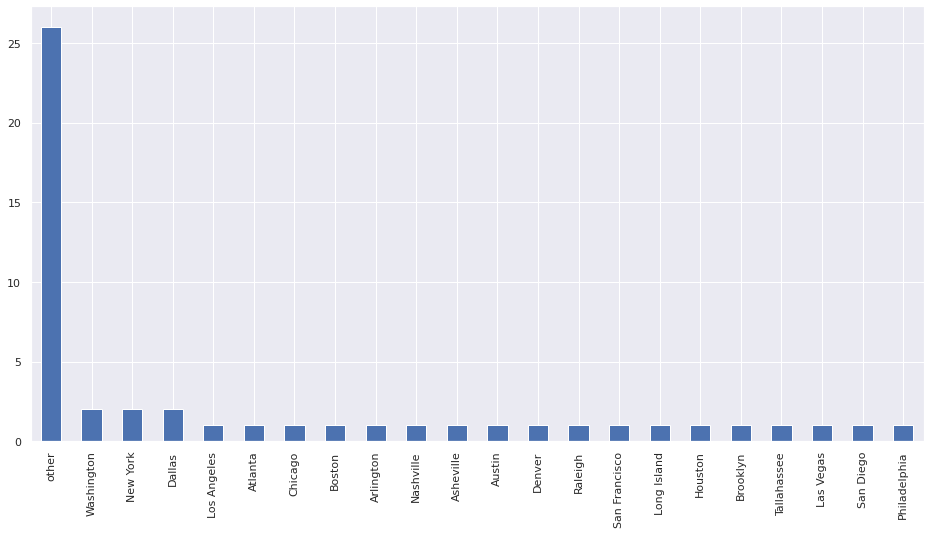

In [31]:
f, ax = plt.subplots(1,1, figsize=(16,8))
dt['city'].value_counts().plot(kind="bar")

plt.show()

Most of the user tweets originate from newyork and dallas

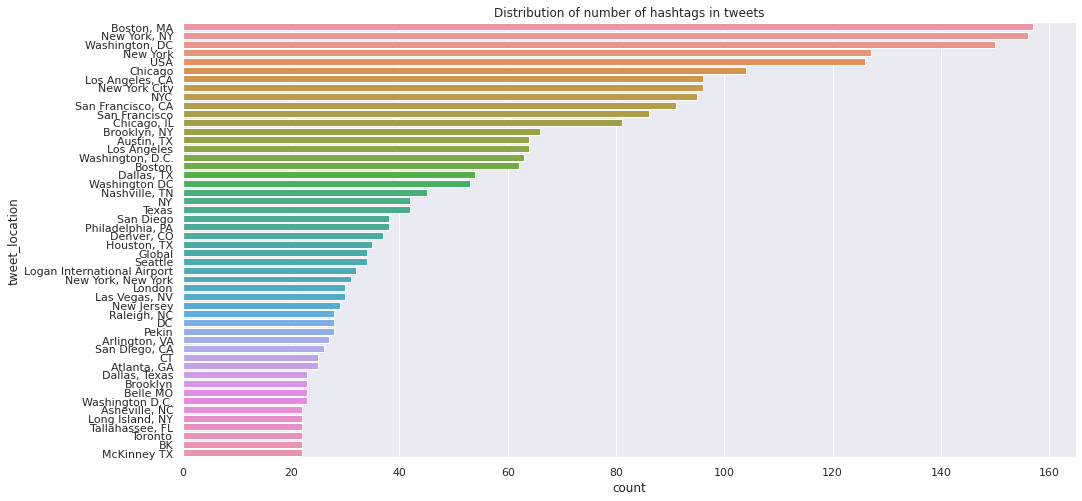

In [32]:
#get the count of tweets from every place
f, ax = plt.subplots(1,1, figsize=(16,8))
ds = dt.groupby(['tweet_location']).sum().sort_values(by='count', ascending=False).reset_index()
ds = ds[ds["tweet_location"]!="other"]

# get the plot with no of twwets contains x number of tags
dt = ds

fig = sns.barplot( 
    x
    =dt["count"], 
    y=dt["tweet_location"], 
    orientation='horizontal'
).set_title('Distribution of number of hashtags in tweets')

Boston, newyork and washington have most number of the hastag counts

### **Word Cloud for Negative Tweets**

In [33]:
from wordcloud import WordCloud,STOPWORDS

In [34]:
negative_tweets=df[df['airline_sentiment']=='negative']
words = ' '.join(negative_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [35]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

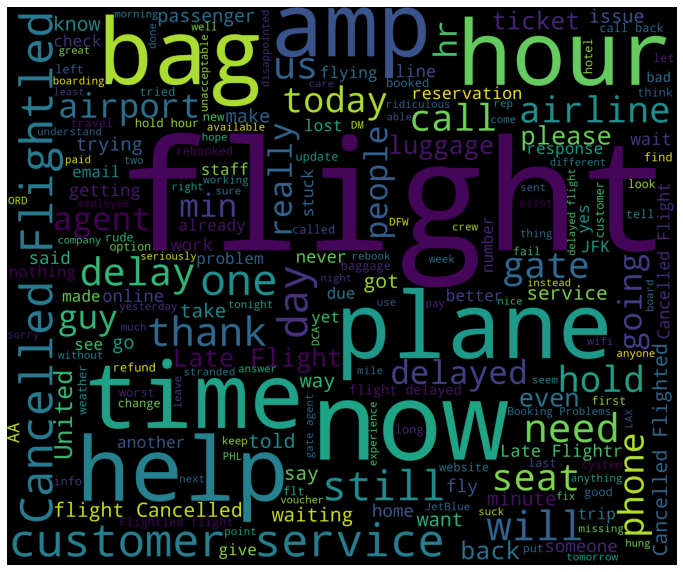

In [36]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Important features for the negative reviews are flight, hour, time, help, bag. In general it looks like flight delay, baggage issues and customer issues are the main reasons for the negative reviews

### **Word Cloud for Positive Tweets**

In [37]:
positive_tweets=df[df['airline_sentiment']=='positive']
words = ' '.join(positive_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [38]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

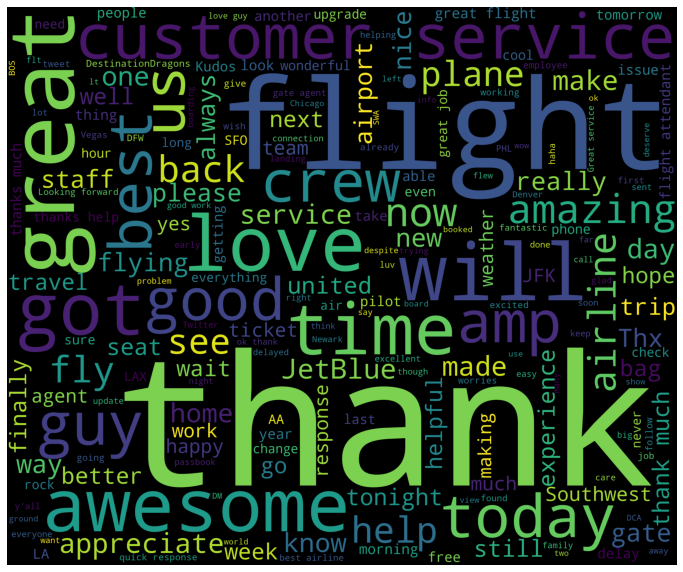

In [39]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Thank, flight, awesome are the important features for positive reviews. It looks like passengers enjoyed the onboarding experience

### **Word Cloud for Neutral Tweets**

In [40]:
positive_tweets=df[df['airline_sentiment']=='neutral']
words = ' '.join(positive_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [41]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

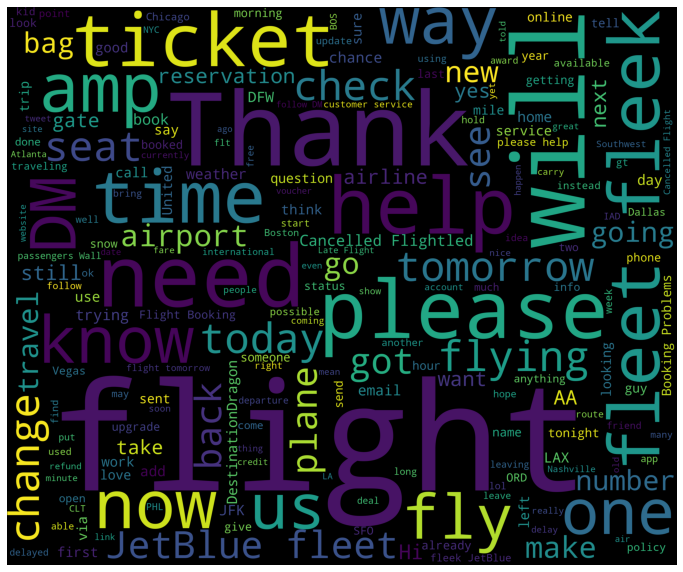

In [42]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Flight, thank, need, help are the major features for the neutral reviews.

# 5. <a name = "link5"></a>Text Pre-processing
Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a method to resolve such issues.

**Data Pre-processing steps here:**

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Remove the URL's.
- Remove the mentions in the tweets('@').
- Tokenization.
- To remove Stopwords.
- Remove the punctuations.
- Remove the non-ASCII characters.
- Remove the hashtags.
- Lemmatized data.
- We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

I am only taking the `text` and `airline_sentiment` for the data pre-processing as other features are not relevant to the sentiment analysis

In [43]:
df = df[["text","airline_sentiment"]]

In [44]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

df.head()                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [45]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    text = remove_url(text)
    text = remove_mention(text)
    return text
df['text'] = df['text'].apply(lambda x: clean_text(x))
df.head()

,text,airline_sentiment
0,What said.,neutral
1,plus you have added commercials to the experience... tacky.,positive
2,I did not today... Must mean I need to take another trip!,neutral
3,"it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,and it is a really big bad thing about it,negative


In [46]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df.head()

,text,airline_sentiment
0,"[What, said, .]",neutral
1,"[plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[and, it, is, a, really, big, bad, thing, about, it]",negative


In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


# Remove the hashtags
def remove_hash(text):
   """Remove hashtags from list of tokenized words"""
   new_words = []
   for word in words:
     new_word = re.sub(r'#\w+','',word)
     if new_word != '':
       new_words.append(new_word)
   return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)

In [49]:
df.head()

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


# 6. <a name = "link6"></a>Vectorization

## 6.1 Bag of Words (CountVectorizer)
      
In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are **d** unique words in our dictionary then for every review the vector will be of length **d** and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.


In [50]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(df['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [51]:
data_features.shape       #Shape of the feature vector

(14640, 500)

In [52]:
X = data_features

y = df.airline_sentiment

In [53]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [54]:
y_test.head(5)

10980    negative
10981    negative
10982    negative
10983    negative
10984    positive
Name: airline_sentiment, dtype: object

In [55]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [56]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

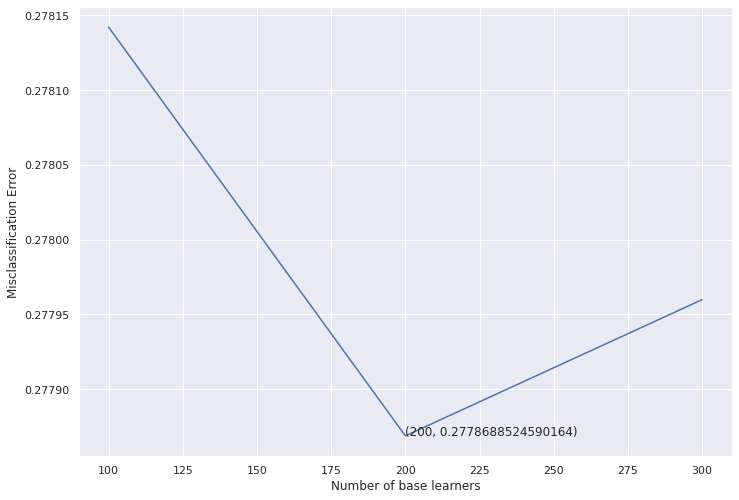

In [57]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [58]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['negative' , 'neutral','positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      2627
     neutral       0.46      0.49      0.48       577
    positive       0.62      0.63      0.63       456

    accuracy                           0.77      3660
   macro avg       0.65      0.66      0.66      3660
weighted avg       0.78      0.77      0.77      3660

Accuracy of the model is :  0.7707650273224044


[[2249  267  111]
 [ 226  283   68]
 [ 106   61  289]]


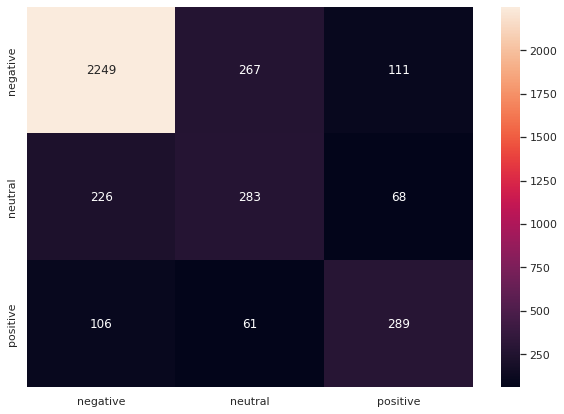

In [59]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral','positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

We see in the above confusion matrices, Randomforest with count vectorizer did an excellent job predicting a negative label when the tweet was negative but suffered more with predicting positive and neutral labels. This may be due to the fact that our training was largely comprised of negative tweets, so the model learned to give a higher probability to a negative label from this class imbalance.

thank,delay,great,flight,love,get,hours,bag,hold,awesome,fly,cancel,hour,would,amaze,please,best,go,make,help,service,wait,need,customer,time,call,worst,plane,never,like,still,one,fleek,lose,say,us,know,good,try,miss,
 
 


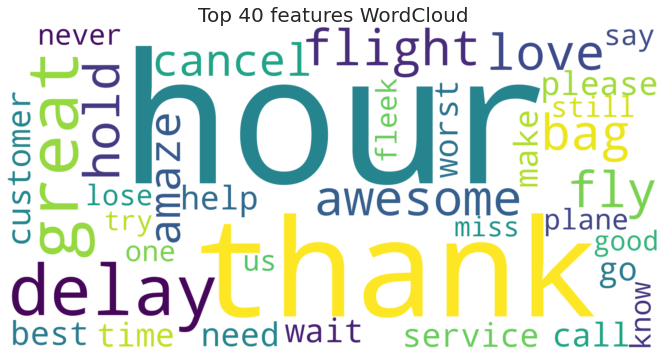

In [60]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

The meaningful words that can be spotted in count vectorizer word cloud directly are “great” , "thank" and “hour”.

## 6.2 TfidfVectorizer
**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [61]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(df['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 500)

In [62]:
X = data_features

y = df.airline_sentiment

In [63]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [64]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [65]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

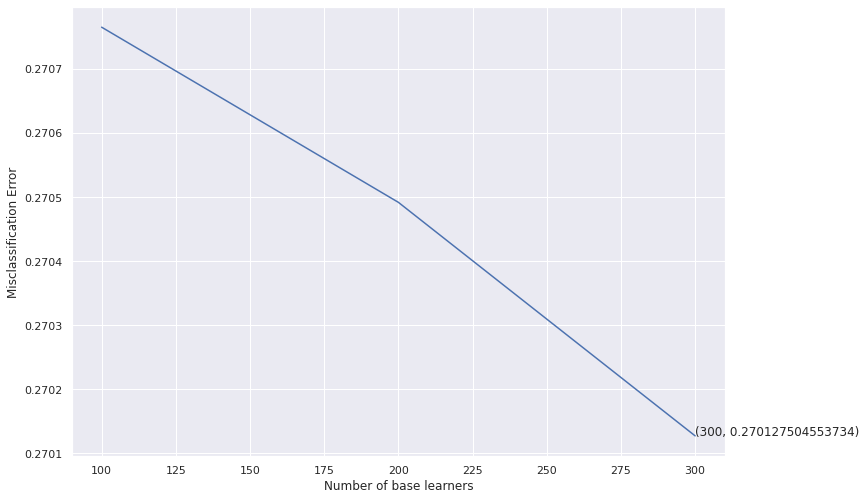

In [66]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [67]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['negative' , 'neutral', 'positive']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

    negative       0.85      0.90      0.88      2627
     neutral       0.54      0.42      0.48       577
    positive       0.67      0.62      0.65       456

    accuracy                           0.79      3660
   macro avg       0.69      0.65      0.67      3660
weighted avg       0.78      0.79      0.79      3660

Accuracy of the model is :  0.7939890710382513


[[2377  164   86]
 [ 278  244   55]
 [ 131   40  285]]


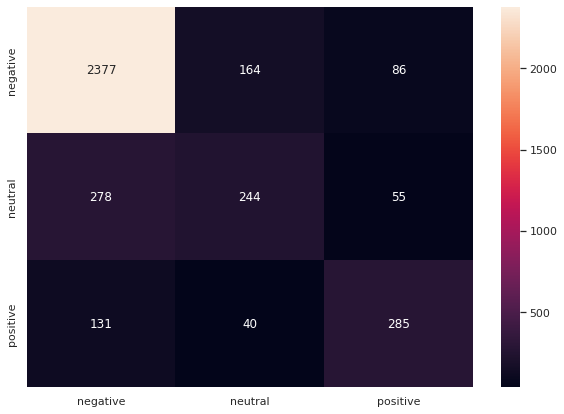

In [68]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral','positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Randomforest with TF-IDF vectorizer does a slightly better job at correctly classifying negative tweets but its performance greatly suffers with the other 2 labels.

thank, flight, great, delay, love, get, hours, awesome, hold, bag, cancel, fly, best, please, amaze, hour, service, would, wait, make, time, need, fleet, go, help, dm, know, good, call, plane, airline, customer, fleek, follow, still, tomorrow, worst, say, like, us, 
 
 


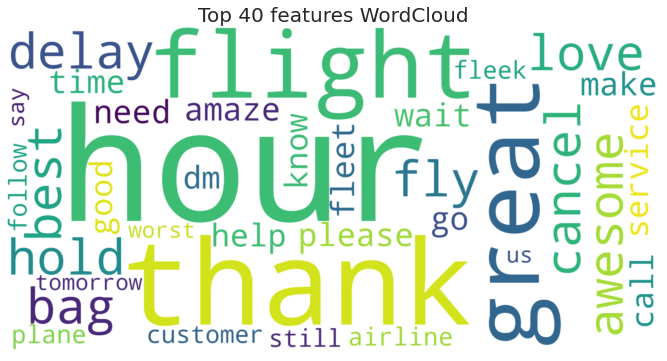

In [69]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

The meaningful words that can be spotted in TF-IDF vectorizer word cloud directly are “thank” and “hour”.

# 7. <a name = "link7"></a> Comparison of Supervised Models

In [70]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df1 = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df1['count_vectorizer_predicted'] = count_vectorizer_predicted
df1['tf_idf_predicted'] = tf_idf_predicted
df1.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,negative,negative,negative
1,negative,negative,negative
2,negative,negative,negative
3,negative,negative,negative
4,positive,negative,negative


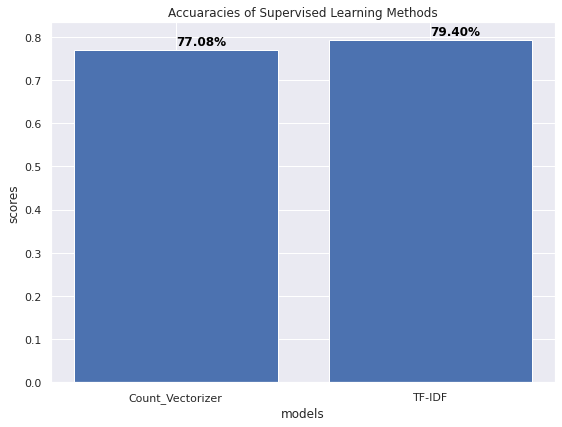

In [71]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

* **TF-IDF shows a better performance than Count Vectorizer**, because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

# 8. <a name = "link8"></a> Unsupervised Learning

## 8.1 VADER
**VADER (Valence Aware Dictionary and Sentiment Reasoner)** is a lexicon and rule-based sentiment analysis tool. VADER not only tells us about the Positivity and Negativity score, but also tells us **how** positive or negative a sentiment is.

In [72]:
import nltk
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [73]:
df.head()

,text,airline_sentiment
0,say,neutral
1,plus add commercials experience tacky,positive
2,today must mean need take another trip,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative
4,really big bad thing,negative


In [74]:
data_new = df.copy()   #make a copy of dataframe and do unsupervised operations on that dataframe

In [75]:
#Calculate the polarity score of the reviews
data_new['scores'] = data_new['text'].apply(lambda review: sentiment.polarity_scores(review))

data_new.head()

,text,airline_sentiment,scores
0,say,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,plus add commercials experience tacky,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,today must mean need take another trip,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,"{'neg': 0.369, 'neu': 0.43, 'pos': 0.201, 'compound': -0.3306}"
4,really big bad thing,negative,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'compound': -0.5829}"


In [76]:
#Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head()

,text,airline_sentiment,scores,compound
0,say,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
1,plus add commercials experience tacky,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,today must mean need take another trip,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,"{'neg': 0.369, 'neu': 0.43, 'pos': 0.201, 'compound': -0.3306}",-0.3306
4,really big bad thing,negative,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'compound': -0.5829}",-0.5829


In [77]:
#Classify the class of the review by keeping threshold on the compund score
#data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')
data_new['comp_score'] = data_new['compound'].apply(lambda c: 'positive' if c>=0.05  else('negative' if c<= -0.05 else 'neutral'))
data_new.head()

,text,airline_sentiment,scores,compound,comp_score
0,say,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
1,plus add commercials experience tacky,positive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,today must mean need take another trip,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,"{'neg': 0.369, 'neu': 0.43, 'pos': 0.201, 'compound': -0.3306}",-0.3306,negative
4,really big bad thing,negative,"{'neg': 0.557, 'neu': 0.443, 'pos': 0.0, 'compound': -0.5829}",-0.5829,negative


In [78]:
df["VADER_pred"] = data_new['comp_score'].tolist()
df.head()

,text,airline_sentiment,VADER_pred
0,say,neutral,neutral
1,plus add commercials experience tacky,positive,neutral
2,today must mean need take another trip,neutral,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,negative
4,really big bad thing,negative,negative


In [79]:
#Calculate the accuracy of the Vader Sentiment Analysis
#df["airline_sentiment"] = df["airline_sentiment"].astype(int)   #convert the sentiment column values into int data type
#df["VADER_pred"] = df["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type
print("Accuaracy using Vader Sentiment Analysis is : ",
      accuracy_score(df["airline_sentiment"].tolist(),df["VADER_pred"].tolist()))

Accuaracy using Vader Sentiment Analysis is :  0.5040983606557377


[[4009 2112 3057]
 [ 403 1306 1390]
 [  82  216 2065]]


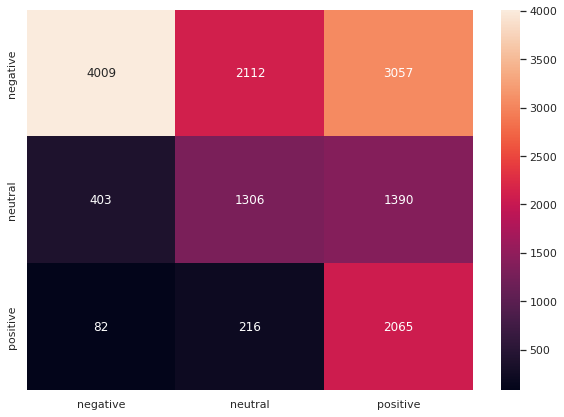

In [80]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(df["airline_sentiment"].tolist(), df['VADER_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral','positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

#### With the help of the TextBlob.sentiment() method, **we can get the sentiments of the sentences by using TextBlob.sentiment() method.**

## 8.2 TextBlob

In [81]:
from textblob import TextBlob

In [82]:
df.head()

,text,airline_sentiment,VADER_pred
0,say,neutral,neutral
1,plus add commercials experience tacky,positive,neutral
2,today must mean need take another trip,neutral,neutral
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,negative
4,really big bad thing,negative,negative


In [83]:
data_new = df.copy()      #make a copy of dataframe and do unsupervised operations on that dataframe

In [84]:
#Calculate the polarity score of the reviews
data_new['polarity']  = data_new['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

data_new.head()

,text,airline_sentiment,VADER_pred,polarity
0,say,neutral,neutral,0.00000
1,plus add commercials experience tacky,positive,neutral,0.00000
2,today must mean need take another trip,neutral,neutral,-0.31250
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,negative,0.00625
4,really big bad thing,negative,negative,-0.35000


In [85]:
#Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: 'positive' if c>=0.05  else('negative' if c<= -0.05 else 'neutral'))

data_new.head()

,text,airline_sentiment,VADER_pred,polarity,polarity_score
0,say,neutral,neutral,0.00000,neutral
1,plus add commercials experience tacky,positive,neutral,0.00000,neutral
2,today must mean need take another trip,neutral,neutral,-0.31250,negative
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,negative,0.00625,neutral
4,really big bad thing,negative,negative,-0.35000,negative


In [86]:
df["Text_Blob_pred"] = data_new['polarity_score'].tolist()
df.head()

,text,airline_sentiment,VADER_pred,Text_Blob_pred
0,say,neutral,neutral,neutral
1,plus add commercials experience tacky,positive,neutral,neutral
2,today must mean need take another trip,neutral,neutral,negative
3,really aggressive blast obnoxious entertainment guests face little recourse,negative,negative,neutral
4,really big bad thing,negative,negative,negative


In [87]:
#Calculate the accuracy of the Vader Sentiment Analysis
#data["sentiment"] = data["sentiment"].astype(int)  #convert the sentiment column values into int data type
#data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type
print("Accuaracy of using Text Blob Sentiment Analysis is : ",
      accuracy_score(df["airline_sentiment"].tolist(),df["Text_Blob_pred"].tolist()))

Accuaracy of using Text Blob Sentiment Analysis is :  0.4024590163934426


[[2492 4163 2523]
 [ 234 1950  915]
 [  94  819 1450]]


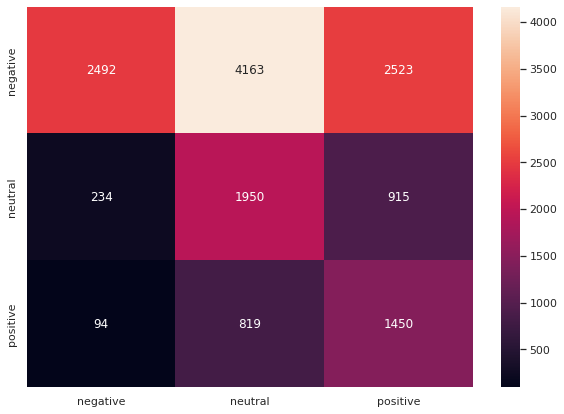

In [88]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(df["airline_sentiment"].tolist(), df['Text_Blob_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral', 'positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# 9. <a name = "link9"></a>Comparison of Unsupervised Models

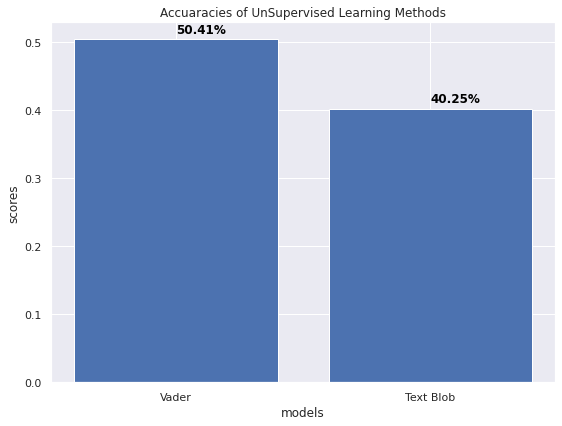

In [89]:
#plot the accuaracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculation accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(df["airline_sentiment"].tolist(),df["VADER_pred"].tolist()),accuracy_score(df["airline_sentiment"].tolist(),df["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #tittle of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

Here, VADER works better than TextBlob because VADER generally works better with things like slang, emojis, etc — whereas TextBlob performs strongly with more formal language usage. There are lot of slang usage in the text which makes it perform better with VADER

# 10. <a name = "link10"></a>Summary

In this notebook, I conducted experiments on the US Airline dataset with supervised and unsupervised classification methods to predict customer sentiment prediction on tweets. 
- The Random Forest supervised algorighm was applied using two different feature extraction approaches such as Bag-of-Word (count vectorizer), TF-IDF . The best results of both models were with TF-IDF as it takes into account frequency and importance of the words.
- I analyzed how model transform, feature extraction, and the number of classes
affects classification results. 
- In addition, Unsupervised methods such as VADER and TextBlob
are applied. The best results of both models were with VADER. As the text contains lot of slang words, VADER works better compared to TextBlob 
- I used different evaluation measurements such as accuracy, precision,
recall1, F1 score to demonstrate the effectiveness of our model.
- Among all algorithms proposed in this notebook, it can be stated
that both TF-IDF in supervised and VADER in Supervised outperform all other
methods implemented in this work. 
-Potential furthur improvements involve:
  - Better sampling strategy to eliminate class imbalance in the dataset
  - Tune the model performance with hyper-parameters
  - Conduct additional experiments using other supervised models or deep learning models as the models experimented in this notebook does not do a better job at classifying both neutral and positive tweets. It will not be better at generalizing dataset comprised of negative tweets.
  - Perform additional data pre-processing to convert the slang words to improve accuracy